In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from mpl_toolkits.mplot3d import Axes3D

from ch_3_metrics import *

In [2]:
def get_grid_range(X):
    X_min, X_max = X.min(), X.max()
    grid_range = np.linspace(X_min, X_max, 10)
    return grid_range

In [3]:
advertising_data = pd.read_csv('data/advertising.csv', index_col=[0])

In [4]:
# X contains TV and radio data
X = advertising_data.iloc[:, :-2].to_numpy()
y = advertising_data.loc[:, 'sales'].to_numpy()

In [5]:
# create column with TV and radio synergy / interaction
tv_radio = (X[:, 0] * X[:, 1]).reshape(-1, 1)
X = np.concatenate((X, tv_radio), axis=1)

In [6]:
# evaluate regression on TV, radio and interaction term
X = sm.add_constant(X)
sm_model = sm.OLS(endog=y, exog=X)
results = sm_model.fit()

rse, r_squared, f_statistic = get_metrics(results)
print(results.summary().tables[1])
display_metrics(rse, r_squared, f_statistic)

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000       6.261       7.239
x1             0.0191      0.002     12.699      0.000       0.016       0.022
x2             0.0289      0.009      3.241      0.001       0.011       0.046
x3             0.0011   5.24e-05     20.727      0.000       0.001       0.001
Residual Standard Error: 0.943515
R Squared: 0.967791
F Statistic: 1963.056876



In [7]:
# create curved regression plane 
X1_grid_range = get_grid_range(X[:, 1])
X2_grid_range = get_grid_range(X[:, 2])

X1_grid, X2_grid = np.meshgrid(X1_grid_range, X2_grid_range)

# TV and radio synergy for surface plot
X3 = (X1_grid * X2_grid).reshape(-1, 1)

X_pred = np.concatenate(
    (X1_grid.reshape(-1, 1), X2_grid.reshape(-1, 1), X3), 
    axis=1
)
X_pred = sm.add_constant(X_pred)

y_pred = results.predict(X_pred)
y_pred = y_pred.reshape(X1_grid.shape)

<IPython.core.display.Javascript object>


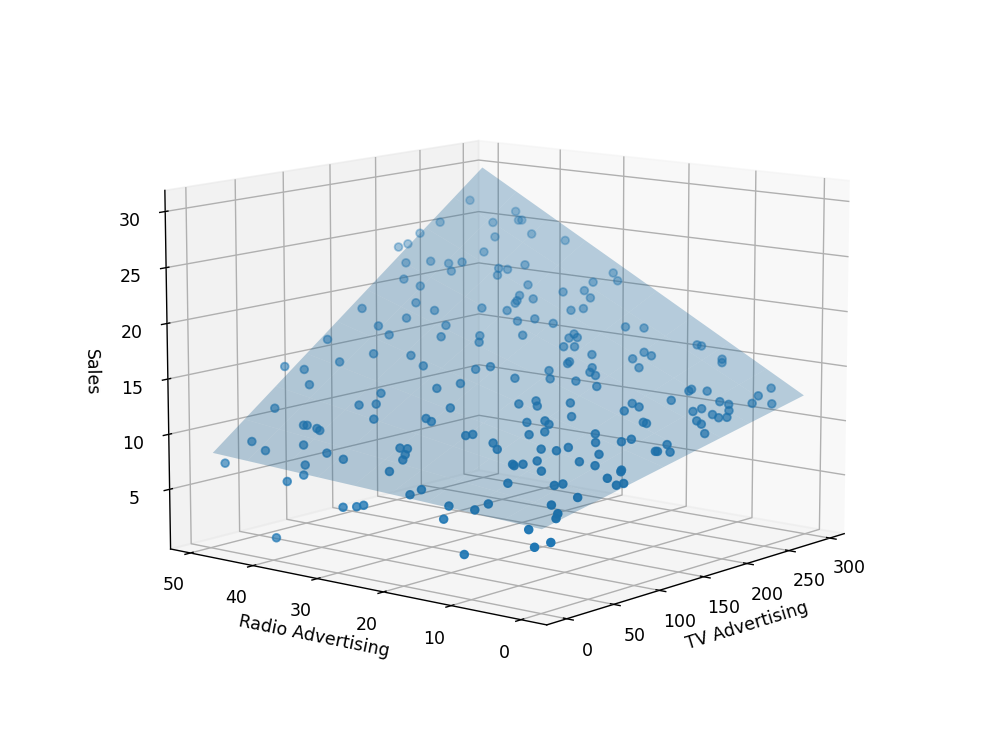

In [8]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:, 1], X[:, 2], y)
ax.plot_surface(
    X1_grid, 
    X2_grid, 
    y_pred, 
    alpha=0.3
)

ax.set_xlabel('TV Advertising')
ax.set_ylabel('Radio Advertising')
ax.set_zlabel('Sales')

plt.show()